<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from statsmodels.formula.api import ols 

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\Sacramento_transactions.csv"

In [3]:
df=pd.read_csv(house_csv)

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.shape

(985, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

# ANSWER
The Target Variable is the price.

#### 2.2 List all possible variables which might be Predictor variable.

# ANSWER
Beds, Baths, sq_ft would be the best predictors of price

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [8]:
# ANSWER
corr = df.corr(numeric_only=True)
corr

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


<Axes: >

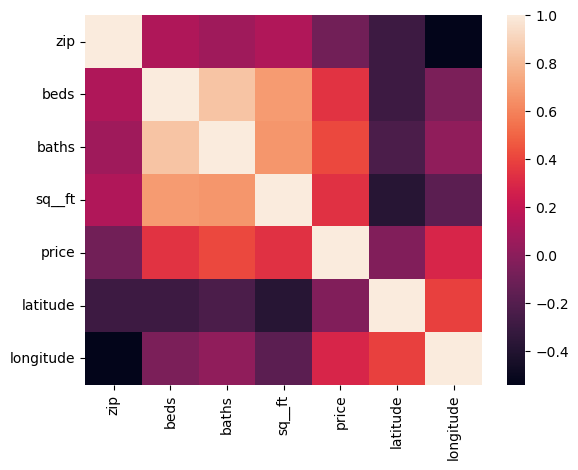

In [9]:
sns.heatmap(corr)

The strongest predictor is the number of baths as it has the highest correlation with price (0.416) followed by number of beds (0.342) the size in square feet (0.334).
However, let's have a closer look at the data below by checking the sq__ft Predictor variables.

In [10]:
df.sq__ft.value_counts()

sq__ft
0       171
1120      8
795       6
1039      5
1080      5
       ... 
1366      1
804       1
1995      1
779       1
1319      1
Name: count, Length: 603, dtype: int64

We have 171 dwelling with an area of 0 square feet which is not logical. I made the decision to drop these dwellings to minimise distortions from outliers in the data.

In [11]:
df2 = df.drop(df[df['sq__ft'] == 0].index)

In [12]:
df2.shape

(814, 12)

In [13]:
corr_2 = df2.corr(numeric_only=True)
corr_2

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.219591,-0.134134,-0.562983
beds,-0.072673,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,-0.103332,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,-0.101560,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,-0.219591,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.134134,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,-0.562983,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


Now the strongets predictor is the size of the dwelling as it has the highest correlation (sq__ft x price). Therefore we will use the square feet 

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

We can use linear regression to predict prices while using sq__ft as our predictor price.

<Axes: xlabel='sq__ft', ylabel='price'>

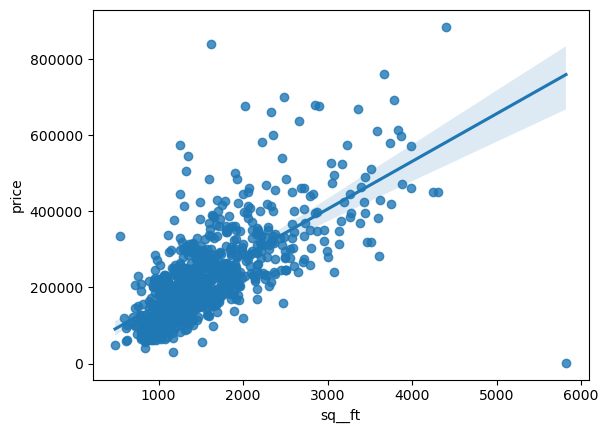

In [14]:
# ANSWER
sns.regplot(x = df2.sq__ft, y = df2.price)

In [15]:
sqft_np = df2.sq__ft.to_numpy()
price_np = df2.price.to_numpy()
type(sqft_np)

numpy.ndarray

In [16]:
sqft = sqft_np.reshape(-1,1)
price = price_np.reshape(-1,1)

In [17]:
reg = LinearRegression().fit(sqft, price)
print('Intercept (B0) is equal to: ' + str(reg.intercept_))
print('Coefficient (B1) is equal to: ' + str(reg.coef_))

Intercept (B0) is equal to: [30210.63386692]
Coefficient (B1) is equal to: [[125.21648668]]


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

Check Section 2.7D

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [19]:
df2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [20]:
# ANSWER
X_bar = df2.sq__ft.mean()
X_bar

1591.1461916461917

In [21]:
Y_bar = df2.price.mean()
Y_bar

229448.3697788698

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [22]:
# ANSWER
X = df2.sq__ft.to_list()
type(X)

list

In [23]:
Y = df2.price.to_list()
type(Y)

list

In [24]:
num = sum([(yi-Y_bar)*(xi-X_bar) for xi,yi in zip(X,Y)])
num

44862288072.99632

In [25]:
den = sum([(xi-X_bar)**2 for xi in X])
den

358277805.6031945

In [26]:
beta_1 = num/den
beta_1

125.21648667984451

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [27]:
# ANSWER
beta_0 = Y_bar - beta_1*X_bar
beta_0

30210.633866919117

To confirm that the linear regression model from scikit which we used in sections works fine, I have worked through it by hand and here are the results:

Scikit: y = 30210.63386692 + 125.21648668 * X
Manual calculations: y = 30210.633866919117 + 125.21648667984451 * X

Therefore we can conclude that our calculations worked fine. We can now use the Scikit LinearRegression tool from now on.

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

Scikit: y = 30210.63386692 + 125.21648668 * X
Manual calculations: y = 30210.633866919117 + 125.21648667984451 * X

Yhat equation is shown above.

In [28]:
df2['Yhat'] = beta_0 + beta_1 * df2['sq__ft']
df2.Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: Yhat, Length: 814, dtype: float64

In [29]:
df2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,134891.616731
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,176338.273822
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,129882.957264
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,136895.080518
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,130008.173751


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [30]:
# ANSWER
df2['Residuals'] = df2['price'] - df2['Yhat']
df2.Residuals

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Name: Residuals, Length: 814, dtype: float64

In [31]:
df2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Yhat,Residuals
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,134891.616731,-75669.616731
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,176338.273822,-108126.273822
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,129882.957264,-61002.957264
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,136895.080518,-67588.080518
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,130008.173751,-48108.173751


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [39]:
# ANSWER
def r_square_calc(yi, y_bar, yhat):
    yi_list = yi.to_list()
    yhat_list = yhat.to_list()
    
    ss_tot = sum([(yi-y_bar)**2 for yi in yi_list])
    ss_res = sum([(yi-y_hat)**2 for yi,y_hat in zip(yi_list,yhat_list)])
    
    r_square = 1 - (ss_res / ss_tot)
    p = print('Rsquare = ' + str(r_square))
    return p

In [40]:
r_square_calc(df2.price, df2.price.mean(), df2.Yhat)

Rsquare = 0.48123071333268996


In [41]:
linear_model = ols('price ~ sq__ft', data = df2).fit()

In [38]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     753.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          7.67e-118
Time:                        13:55:03   Log-Likelihood:                -10406.
No. Observations:                 814   AIC:                         2.082e+04
Df Residuals:                     812   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.021e+04   7865.211      3.841      0.0

Using 2 methods to find R-squared yielded the same result (0.481).

##### 2.7.F [BONUS] Draw Plot of Predicted Line

Text(0.5, 1.0, 'Predicted Price vs Area in Square Feet')

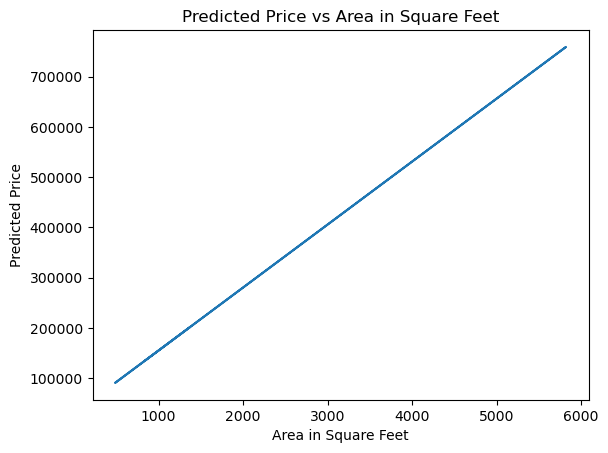

In [45]:
# ANSWER
plt.plot(df2.sq__ft, df2.Yhat)
plt.xlabel('Area in Square Feet')
plt.ylabel('Predicted Price')
plt.title('Predicted Price vs Area in Square Feet')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

Text(0.5, 1.0, 'Predicted Price and residuals vs Area in Square Feet')

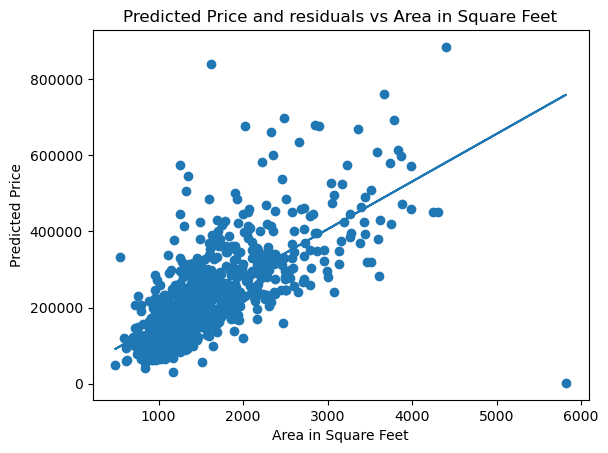

In [48]:
# ANSWER
plt.plot(df2.sq__ft, df2.Yhat)
plt.scatter(df2.sq__ft, df2.price)
plt.xlabel('Area in Square Feet')
plt.ylabel('Predicted Price')
plt.title('Predicted Price and residuals vs Area in Square Feet')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [49]:
# ANSWER
price = 30210.63386692 + 125.21648668 * 1204
print('Price for house at 1140 Edmonton Dr is worth approximately ' + str(price))

Price for house at 1140 Edmonton Dr is worth approximately 180971.28382964




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



